# Analysis for Week 12

In [34]:
# Import libraries
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import matplotlib.pyplot as plt

## Energy Plots

In [4]:
# Load file for water
water_file = 'Runs/Water/water_aimd_1ps_every0.5fs-1.ener'
water_en = np.loadtxt(water_file)

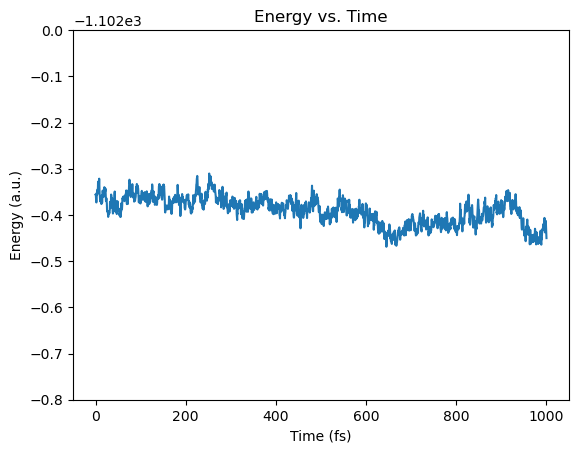

In [20]:
# Plot energy vs time
plt.title('Energy vs. Time')
plt.plot(water_en[:,1], water_en[:,2] + water_en[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.ylim((-1102.8, -1102))
plt.show()

In [12]:
# Load file for proton
proton_file = 'Runs/Proton/proton_aimd_1ps_every0.5fs-1.ener'
proton_en = np.loadtxt(proton_file)

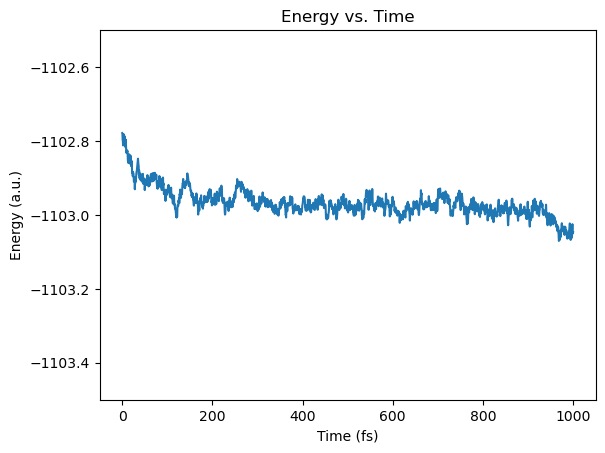

In [17]:
# Plot energy vs time
plt.title('Energy vs. Time')
plt.plot(proton_en[:,1], proton_en[:,2] + proton_en[:,4])
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.ylim((-1103.5, -1102.5))
plt.show()

## Radial Distribution Function

In [48]:
# Load data
u = mda.Universe('Runs/Water/water_aimd_1ps_every0.5fs-pos-1.xyz')
u.dimensions = [12.42, 12.42, 12.42, 90.0, 90.0, 90.0]
ag1 = u.select_atoms('name O')
water_rdf = rdf.InterRDF(ag1, ag1, nbins=100, verbose=True)
water_rdf.run()

  0%|          | 0/2001 [00:00<?, ?it/s]/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
100%|██████████| 2001/2001 [00:01<00:00, 1139.10it/s]


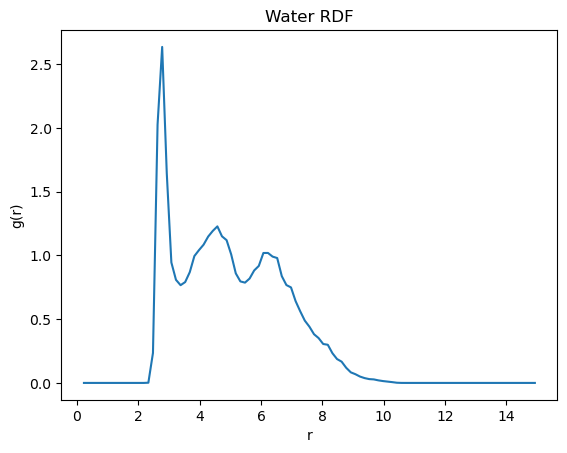

In [55]:
plt.title('Water RDF')
plt.ylabel('g(r)')
plt.xlabel('r')
plt.plot(water_rdf.bins[1:], water_rdf.rdf[1:])

In [53]:
u = mda.Universe('Runs/Proton/proton_aimd_1ps_every0.5fs-pos-1.xyz')
u.dimensions = [12.42, 12.42, 12.42, 90.0, 90.0, 90.0]
ag1 = u.select_atoms('name O')
proton_rdf = rdf.InterRDF(ag1, ag1, nbins=100, verbose=True)
proton_rdf.run()

  0%|          | 0/2001 [00:00<?, ?it/s]/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
100%|██████████| 2001/2001 [00:01<00:00, 1138.50it/s]


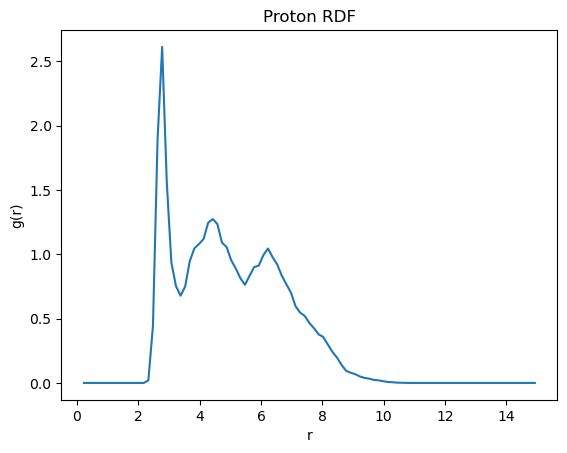

In [56]:
plt.title('Proton RDF')
plt.ylabel('g(r)')
plt.xlabel('r')
plt.plot(proton_rdf.bins[1:], proton_rdf.rdf[1:])